<a href="https://colab.research.google.com/github/JUHYUN030/Hanium_project/blob/main/%EB%A7%A4%EB%A7%A4%EA%B0%80%EA%B2%A9%EC%A7%80%EC%88%98_RF_%EA%B8%88%EB%A6%AC%EC%A0%9C%EC%99%B8_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_squared_error, mean_absolute_error, r2_score
from tqdm import tqdm
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [ ]:
df = pd.read_csv('/content/월별_코스피지수_수정_202012.csv', encoding= 'utf-8')
df

,시점,코스피지수
0,2012. 01,1891.01
1,2012. 02,2003.23
2,2012. 03,2023.41
3,2012. 04,1995.92
4,2012. 05,1886.35
...,...,...
103,2020. 08,2349.87
104,2020. 09,2371.52
105,2020. 10,2357.82
106,2020. 11,2504.18


In [ ]:
df1 = pd.read_csv('/content/월간_매매가격지수_아파트_수정_202012.csv', encoding= 'utf-8')
df1

,년월,매매가격지수
0,2012-01-01,78.997
1,2012-02-01,78.797
2,2012-03-01,78.456
3,2012-04-01,78.012
4,2012-05-01,77.588
...,...,...
103,2020-08-01,95.849
104,2020-09-01,96.131
105,2020-10-01,96.241
106,2020-11-01,96.354


In [ ]:
df1['MA3'] = df1['매매가격지수'].rolling(3).mean()
df1

,년월,매매가격지수,MA3
0,2012-01-01,78.997,NaN
1,2012-02-01,78.797,NaN
2,2012-03-01,78.456,78.750000
3,2012-04-01,78.012,78.421667
4,2012-05-01,77.588,78.018667
...,...,...,...
103,2020-08-01,95.849,95.149000
104,2020-09-01,96.131,95.769333
105,2020-10-01,96.241,96.073667
106,2020-11-01,96.354,96.242000


In [ ]:
df1['MA6'] = df1['매매가격지수'].rolling(6).mean()
df1[:7]

,년월,매매가격지수,MA3,MA6
0,2012-01-01,78.997,NaN,NaN
1,2012-02-01,78.797,NaN,NaN
2,2012-03-01,78.456,78.750000,NaN
3,2012-04-01,78.012,78.421667,NaN
4,2012-05-01,77.588,78.018667,NaN
5,2012-06-01,76.976,77.525333,78.137667
6,2012-07-01,76.456,77.006667,77.714167


In [ ]:
df1['코스피지수'] = df['코스피지수']
df1

,년월,매매가격지수,MA3,MA6,코스피지수
0,2012-01-01,78.997,NaN,NaN,1891.01
1,2012-02-01,78.797,NaN,NaN,2003.23
2,2012-03-01,78.456,78.750000,NaN,2023.41
3,2012-04-01,78.012,78.421667,NaN,1995.92
4,2012-05-01,77.588,78.018667,NaN,1886.35
...,...,...,...,...,...
103,2020-08-01,95.849,95.149000,94.726333,2349.87
104,2020-09-01,96.131,95.769333,95.010000,2371.52
105,2020-10-01,96.241,96.073667,95.327333,2357.82
106,2020-11-01,96.354,96.242000,95.695500,2504.18


In [ ]:
df1 = df1.drop(df1.index[:5])
df1

,년월,매매가격지수,MA3,MA6,코스피지수
5,2012-06-01,76.976,77.525333,78.137667,1848.60
6,2012-07-01,76.456,77.006667,77.714167,1826.75
7,2012-08-01,75.770,76.400667,77.209667,1918.91
8,2012-09-01,75.264,75.830000,76.677667,1961.29
9,2012-10-01,74.797,75.277000,76.141833,1942.19
...,...,...,...,...,...
103,2020-08-01,95.849,95.149000,94.726333,2349.87
104,2020-09-01,96.131,95.769333,95.010000,2371.52
105,2020-10-01,96.241,96.073667,95.327333,2357.82
106,2020-11-01,96.354,96.242000,95.695500,2504.18


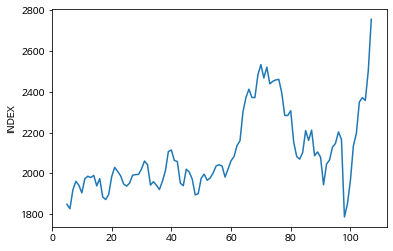

In [ ]:
df1['코스피지수'].plot()
plt.ylabel("INDEX")
plt.show()

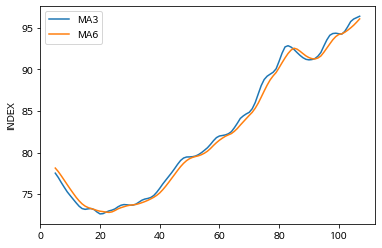

In [ ]:
df1[['MA3','MA6']].plot()
plt.ylabel("INDEX")
plt.show()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 5 to 107
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년월      103 non-null    object 
 1   매매가격지수  103 non-null    float64
 2   MA3     103 non-null    float64
 3   MA6     103 non-null    float64
 4   코스피지수   103 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.8+ KB


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

# feature standardization  (numerical_columns except dummy var.-"CHAS")
scaler = 		MinMaxScaler()  # 최대/최소값이 각각 1, 0이 되도록 스케일링
scale_columns = ['매매가격지수','코스피지수', 'MA3', 'MA6']
df1[scale_columns] = scaler.fit_transform(df1[scale_columns])

In [ ]:
numerical_columns = ['코스피지수', 'MA3', 'MA6']

X = df1[numerical_columns]
y = df1['매매가격지수']

In [ ]:
df1

,년월,매매가격지수,MA3,MA6,코스피지수
5,2012-06-01,0.186066,0.206175,0.229090,0.063827
6,2012-07-01,0.164527,0.184369,0.210903,0.041279
7,2012-08-01,0.136111,0.158891,0.189236,0.136385
8,2012-09-01,0.115152,0.134899,0.166389,0.180120
9,2012-10-01,0.095808,0.111650,0.143377,0.160409
...,...,...,...,...,...
103,2020-08-01,0.967815,0.947111,0.941514,0.581123
104,2020-09-01,0.979496,0.973191,0.953697,0.603465
105,2020-10-01,0.984053,0.985986,0.967325,0.589327
106,2020-11-01,0.988733,0.993063,0.983136,0.740367


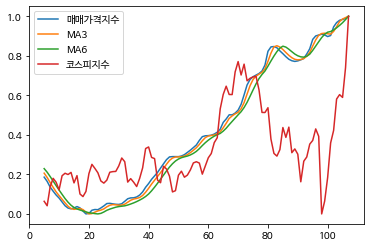

In [ ]:
df1.plot()

In [ ]:
X

,코스피지수,MA3,MA6
5,0.063827,0.206175,0.229090
6,0.041279,0.184369,0.210903
7,0.136385,0.158891,0.189236
8,0.180120,0.134899,0.166389
9,0.160409,0.111650,0.143377
...,...,...,...
103,0.581123,0.947111,0.941514
104,0.603465,0.973191,0.953697
105,0.589327,0.985986,0.967325
106,0.740367,0.993063,0.983136


In [ ]:
y.head()

5    0.186066
6    0.164527
7    0.136111
8    0.115152
9    0.095808
Name: 매매가격지수, dtype: float64

# 상관관계 분석

In [ ]:
# Person 상관계수
cols = ['매매가격지수', '코스피지수', 'MA3', 'MA6']

corr = df1[cols].corr(method = 'pearson')
corr

,매매가격지수,코스피지수,MA3,MA6
매매가격지수,1.000000,0.575600,0.998969,0.995167
코스피지수,0.575600,1.000000,0.560750,0.544064
MA3,0.998969,0.560750,1.000000,0.998167
MA6,0.995167,0.544064,0.998167,1.000000


# 데이터셋 분리

In [ ]:
train = df1.loc[:89]    # 2012.06 ~ 2019.6
test = df1.loc[90:]   # 2019.07 ~ 2020.12

In [ ]:
train.head()

,년월,매매가격지수,MA3,MA6,코스피지수
5,2012-06-01,0.186066,0.206175,0.229090,0.063827
6,2012-07-01,0.164527,0.184369,0.210903,0.041279
7,2012-08-01,0.136111,0.158891,0.189236,0.136385
8,2012-09-01,0.115152,0.134899,0.166389,0.180120
9,2012-10-01,0.095808,0.111650,0.143377,0.160409


In [ ]:
train.tail()

,년월,매매가격지수,MA3,MA6,코스피지수
85,2019-02-01,0.810579,0.831803,0.848585,0.436988
86,2019-03-01,0.795460,0.816598,0.843875,0.387154
87,2019-04-01,0.782412,0.802304,0.833082,0.438969
88,2019-05-01,0.774874,0.790224,0.820641,0.309746
89,2019-06-01,0.771436,0.782096,0.808724,0.328734


In [ ]:
test.head()

,년월,매매가격지수,MA3,MA6,코스피지수
90,2019-07-01,0.774128,0.779293,0.799991,0.302089
91,2019-08-01,0.779471,0.780848,0.794616,0.162525
92,2019-09-01,0.786430,0.785921,0.793056,0.266723
93,2019-10-01,0.809129,0.797763,0.797672,0.287920
94,2019-11-01,0.835473,0.816710,0.808144,0.352975


In [ ]:
test.tail()

,년월,매매가격지수,MA3,MA6,코스피지수
103,2020-08-01,0.967815,0.947111,0.941514,0.581123
104,2020-09-01,0.979496,0.973191,0.953697,0.603465
105,2020-10-01,0.984053,0.985986,0.967325,0.589327
106,2020-11-01,0.988733,0.993063,0.983136,0.740367
107,2020-12-01,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train = train[['코스피지수','MA3','MA6']]
y_train = train[['매매가격지수']]
X_test = test[['코스피지수','MA3','MA6']]
y_test = test[['매매가격지수']]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(85, 3) (85, 1) (18, 3) (18, 1)


# RandomForest

In [ ]:
rf_model = RandomForestRegressor(n_estimators=20,
                              max_depth=5,
                              n_jobs=-1,
                              random_state=5)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=-1, oob_score=False,
                      random_state=5, verbose=0, warm_start=False)

In [ ]:
y_pred = rf_model.predict(X_test)
y_pred

array([0.79083157, 0.79666145, 0.79666145, 0.79759158, 0.82456797,
       0.828516  , 0.81158565, 0.81259427, 0.82464774, 0.82464774,
       0.82464774, 0.8218687 , 0.81158565, 0.79717129, 0.79459745,
       0.79717129, 0.78880029, 0.78880029])

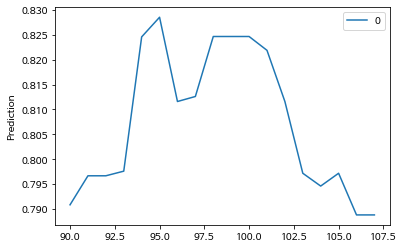

In [ ]:
pd.DataFrame(y_pred, index=y_test.index).plot()
plt.ylabel("Prediction")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('RMSE:', rmse)

MSE: 0.013699996231822902
RMSE: 0.11704698301034035


# k fold

In [ ]:
from sklearn.model_selection import KFold 
kfold = KFold(n_splits=10) 
num_iter = 0 
cv_rmse = []

In [ ]:
for train_idx, test_idx in kfold.split(X):
  X_train, X_test = X.iloc[train_idx, :], X.iloc[test_idx, :] 
  y_train, y_test = y.iloc[train_idx], y.iloc[test_idx] 
  
  rf_model.fit(X_train, y_train) 
  y_pred = rf_model.predict(X_test) 
  num_iter = num_iter + 1 
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  
  print("{}번 검증 셋 rmse : {} ".format(num_iter, rmse)) 
  cv_rmse.append(rmse) 
  
print("mean of rmse : {} ".format(round(np.mean(rmse),7)))

1번 검증 셋 rmse : 0.05168363749123882 
2번 검증 셋 rmse : 0.020189500707244356 
3번 검증 셋 rmse : 0.027208565074028523 
4번 검증 셋 rmse : 0.0620239330292091 
5번 검증 셋 rmse : 0.024294466518925775 
6번 검증 셋 rmse : 0.044729181604175 
7번 검증 셋 rmse : 0.061120378703727794 
8번 검증 셋 rmse : 0.04233875003051506 
9번 검증 셋 rmse : 0.048114876322669295 
10번 검증 셋 rmse : 0.0718101302446003 
mean of rmse : 0.0718101 


# GridSearch

In [ ]:
params ={
    'n_estimators':[10, 20, 50, 100, 150, 200],
    'max_depth':[4, 5, 6, 7, 8, 9, 10]
    }

In [ ]:
from sklearn.model_selection import KFold 
kfold = KFold(n_splits=10) 

In [ ]:
rf_reg = RandomForestRegressor()

In [ ]:
grid_cv = GridSearchCV(estimator=rf_reg, 
                       param_grid=params, 
                       cv=kfold , 
                       n_jobs=-1)
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             v

In [ ]:
grid_cv.best_params_

{'max_depth': 6, 'n_estimators': 100}

In [ ]:
rfc1=RandomForestRegressor(max_depth= 6,
                            n_estimators= 100,
                            random_state = 0)

In [ ]:
rfc1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
pred=rfc1.predict(X_test)
pred

array([0.88402048, 0.88402048, 0.88402048, 0.89036876, 0.89412911,
       0.88606267, 0.88026696, 0.88026696, 0.87720756, 0.87720756])

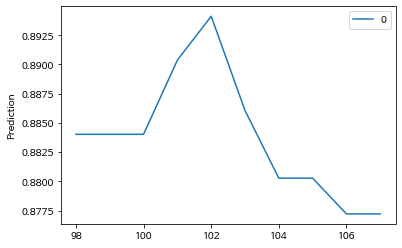

In [ ]:
pd.DataFrame(pred, index=y_test.index).plot()
plt.ylabel("Prediction")
plt.show()

In [ ]:
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
print('MSE:', mse)
print('RMSE:', rmse)

MSE: 0.00589238071597683
RMSE: 0.07676184414132343
